In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

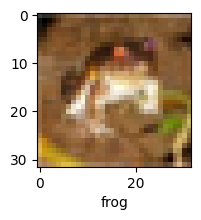

In [10]:
plot_sample(X_train, y_train, 0)

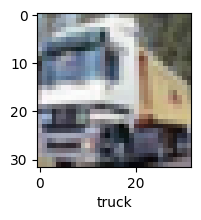

In [11]:
plot_sample(X_train, y_train, 1)

### Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### build a convolutional neural network to train our images

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 96s 60ms/step - loss: 1.4726 - accuracy: 0.4718
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1135 - accuracy: 0.6117
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9830 - accuracy: 0.6560
Epoch 4/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.9027 - accuracy: 0.6878
Epoch 5/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8390 - accuracy: 0.7077
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7874 - accuracy: 0.7241
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7426 - accuracy: 0.7410
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6981 - accuracy: 0.7549
Epoch 9/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6591 - accuracy: 0.7687
Epoch 10/10
1563/1563 [==============================] - 83s 

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1000
           1       0.84      0.77      0.80      1000
           2       0.56      0.63      0.59      1000
           3       0.48      0.57      0.53      1000
           4       0.70      0.57      0.63      1000
           5       0.61      0.56      0.58      1000
           6       0.85      0.70      0.77      1000
           7       0.72      0.78      0.75      1000
           8       0.67      0.89      0.77      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9587 - accuracy: 0.6893


[0.9586784243583679, 0.689300000667572]

In [18]:
y_pred[:5]

array([[1.31218694e-03, 2.64839502e-04, 1.02245333e-02, 8.69705081e-01,
        1.22138334e-03, 7.95162618e-02, 9.25620925e-03, 5.84468653e-04,
        2.78051533e-02, 1.09865126e-04],
       [5.07435529e-04, 3.11159734e-02, 9.71709869e-06, 1.11184249e-06,
        1.26455655e-08, 3.10065551e-09, 1.20465515e-07, 7.81032057e-08,
        9.67378616e-01, 9.86909028e-04],
       [5.84431626e-02, 1.88813612e-01, 5.05256583e-04, 8.59672856e-03,
        3.59724334e-04, 2.67293181e-05, 1.41235287e-04, 2.81250996e-05,
        7.39189506e-01, 3.89589742e-03],
       [9.13995743e-01, 3.16430931e-03, 6.13213517e-03, 4.39308234e-04,
        5.46028896e-05, 1.05861018e-05, 3.37318415e-05, 3.92026013e-05,
        7.60282576e-02, 1.02184167e-04],
       [1.64713783e-05, 2.01760759e-05, 6.47366792e-02, 2.09019445e-02,
        1.92224368e-01, 4.31937166e-03, 7.17666864e-01, 2.74385711e-05,
        8.62799861e-05, 3.74506072e-07]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

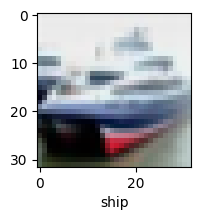

In [20]:
plot_sample(X_test, y_test,1)

In [21]:
classes[y_classes[1]]


'ship'

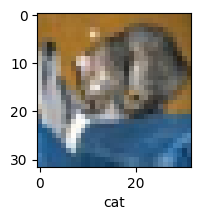

In [22]:
plot_sample(X_test, y_test,0)

In [23]:
classes[y_classes[0]]

'cat'

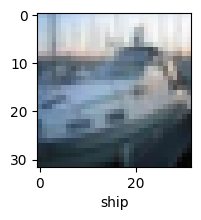

In [24]:
plot_sample(X_test, y_test,2)

In [25]:
classes[y_classes[2]]

'ship'